<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-Ogembo" data-toc-modified-id="Understanding-Ogembo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding Ogembo</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Data-structure" data-toc-modified-id="Data-structure-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data structure</a></span></li><li><span><a href="#Limitations" data-toc-modified-id="Limitations-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Limitations</a></span></li><li><span><a href="#View-of-All-Data" data-toc-modified-id="View-of-All-Data-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>View of All Data</a></span></li><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Summary Stats</a></span></li></ul></li><li><span><a href="#Correlations-Between-Health-&amp;-Operations" data-toc-modified-id="Correlations-Between-Health-&amp;-Operations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlations Between Health &amp; Operations</a></span><ul class="toc-item"><li><span><a href="#KPIs" data-toc-modified-id="KPIs-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>KPIs</a></span></li><li><span><a href="#Diseases/Cases" data-toc-modified-id="Diseases/Cases-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Diseases/Cases</a></span></li><li><span><a href="#Sales-Activity" data-toc-modified-id="Sales-Activity-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Sales Activity</a></span><ul class="toc-item"><li><span><a href="#Meets-Sales-Target" data-toc-modified-id="Meets-Sales-Target-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Meets Sales Target</a></span></li><li><span><a href="#Misses-Sales-Target" data-toc-modified-id="Misses-Sales-Target-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Misses Sales Target</a></span></li><li><span><a href="#Regressions" data-toc-modified-id="Regressions-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>Regressions</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [9]:
## Setup
# load libs/modules
%run "../utils/load_envz.ipynb"

In [10]:
# Load data set 
DATA_DIR = "../dataset"
DATA_FILE = "Ogembo_targeted_chv_support_ke-20180326.csv" 
dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )

dataset.drop( "Phone Number", axis=1, inplace=True )
LAST_DATE = "26-Mar02018"

In [11]:
## themes | variable - outcome mapping
argz_Units = ["CHP ID", "Households Registered"] 
argz_Ops = [ "Sales", "Community Events"]
argz_pregoz = [ "Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"]
argz_U5_care = ["Total U5 Assessments", "Total U5 Treatments"]
argz_U1_care = ["Total U1 Assessments", "Total U1 Treatments"]
argz_malaria = [ "All Malaria Assessments", "All Malaria Treatments", "Act 6pack Issue", "mRDT Used", "%mRDT"]
argz_U5_diseases = ["U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"]

# "Total U1 Assessments",  assumes U1 follows U5 
argz_EPMs = ["Households Registered", "Sales", "Community Events", "Total Child Assessments", "Pregnancy", "On Time Referral f/u Treatment U5"]

## Additional Columns
dataset["Country"] = "KE"
dataset["Total Child Assessments"] = dataset["Total U1 Assessments"] + dataset["Total U5 Assessments"]
dataset["Total Child Treatments"] = dataset["Total U1 Treatments"] + dataset["Total U5 Treatments"]
#dataset["HHQuintiles"] = pd.qcut( dataset["Households Registered"], 5, labels=["HH_Quint_1", "HH_Quint_2", "HH_Quint_3", "HH_Quint_4", "HH_Quint_5"])

#dnul = pd.Series( ["Households Registered"]).apply( lambda x: quintilize(dataset, x, labelzPrefix="HH_Quints" ) )
#dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 2040 , "Below_2040", 
#                                         np.where(dataset["Sales"] < 4080, "2040_to_4080", 
#                                                 np.where(dataset["Sales"] < 6120, "4080_to_6120", 
#                                                         np.where(dataset["Sales"] < 8160, "6120_to_8160", 
#                                                                 np.where(dataset["Sales"] < 10200, "8160_to_10200", "Above_10K")))) ) 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
CHP                                  143 non-null object
CHP ID                               143 non-null object
Pregnancy                            143 non-null int64
PNC Visit Rate                       143 non-null float64
PNC Visit Missed - #                 143 non-null int64
Total U1 Assessments                 143 non-null int64
Total U1 Treatments                  143 non-null int64
Total U5 Assessments                 143 non-null int64
Total U5 Treatments                  143 non-null int64
U5 Malaria                           143 non-null int64
U5 Diarrhea                          143 non-null int64
U5 Pneumonia                         143 non-null int64
On Time Referral f/u Treatment U5    143 non-null float64
Missed Visits                        143 non-null int64
%mRDT                                143 non-null float64
All Malaria Assessments              143 non-nu

# Understanding Ogembo

## Introduction

- Looking at KE CHP data for last 90 days as at 20-Mar-2018


- Some questions of interest
    - What makes sales better?
    - What relationships between sales and health activities? 

- The presented findings are conjectures and not prescriptive or suggestive of causality
    - Need interpretation with more context on how the variables follow from the initiative/program workflows. 


### Data structure 
- There are {{dataset["CHP ID"].count()}} CHPs. Each record relates to a CHP.
- Each record is an aggregate of a CHPs activities for the period (90 days until 20-Mar)
- Outliers are excluded in the analysis. Identification of outliers is based on household registration distribution. 


### Limitations
- Data does not have geographic mapping 
- No daily records for time series exploration 



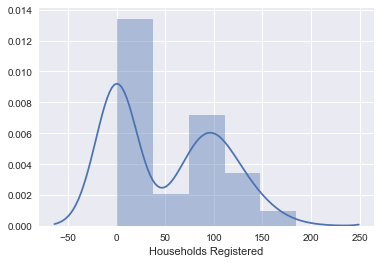

In [12]:
b4_g = sns.distplot( dataset["Households Registered"])
b4_s = sampleStructure(dataset, "Country") 
b4_d = summarizer( dataset )

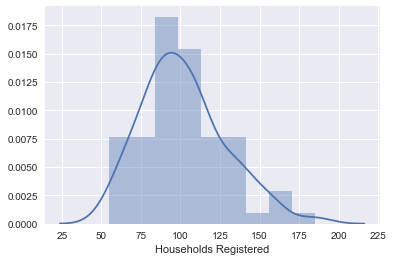

In [13]:

## Remove outliers
# updating dataset to HH > 20 and < 250 
dt_outliers = dataset[ (dataset["Households Registered"] < 20) | (dataset["Households Registered"] > 250) ]
dataset.drop( dt_outliers.index, inplace=True) #<< TODO: go back to boolean indexing

a4_g = sns.distplot( dataset["Households Registered"])
a4_s = sampleStructure(dataset, "Country") 
a4_d = summarizer( dataset )

### View of All Data

For this section outliers are included.

- There are 1493 CHPs in the period
    - Average # households per CHP is 100
    - Total of 148,764 households registered 


- Total Sales of KES 646,630
    - Average sales per CHP is kES 433 
    

In [14]:

print( "All Data Including Outliers - Counts and Averages per CHP")
b4_s
b4_d

All Data Including Outliers - Counts and Averages per CHP


CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP Sales   
Country                                                                     
KE         143                  7344         51.0  525323.0        3674.0   

             Pregnancy                Community Events                 \
        # Pregoz Cases Avg.CHP Pregoz         # Events Avg.CHP Events   
Country                                                                 
KE                 243            2.0              448            3.0   

        All Malaria Assessments                 Total U5 Assessments  \
                # Malaria Cases Avg.CHP Malaria        # Child Cases   
Country                                                                
KE                          928             6.0                 3751   

                   Total U1 Assessments             \
        Avg.CHP U5           # U1 Cases Avg.CHP U1   
Country                                              
KE            26.0                  891        6.0   

        On Time Referral f/u Treatment U5                       
                          # Referrals f/u Avg.CHP Referral f/u  
Country                                                         
KE                                   48.0                  0.0

,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,...,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered,Total Child Assessments,Total Child Treatments
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,1.70,0.29,0.37,6.23,1.59,26.23,8.73,2.92,3.02,2.78,...,0.28,6.49,3.32,5.64,6.49,3673.59,3.13,51.36,32.46,10.32
std,2.46,0.40,0.89,8.44,2.97,32.97,14.73,7.70,5.40,5.42,...,0.40,13.14,8.49,13.14,13.14,8079.53,4.97,54.56,40.89,17.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-1040.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.00,0.00,0.00
75%,3.00,0.67,0.00,11.00,2.00,49.00,13.00,1.50,5.00,3.00,...,0.65,7.00,2.00,4.00,7.00,4909.43,5.00,99.50,59.00,15.00
max,10.00,1.00,7.00,33.00,15.00,137.00,77.00,51.00,30.00,32.00,...,1.00,76.00,55.00,81.00,76.00,59812.62,29.00,185.00,170.00,88.00


### Summary Stats

For this section outliers are included.


In [15]:
#dataset[ ["Total Child Assessments", "Total Child Treatments", "All Malaria Assessments","U5 Malaria", "U5 Diarrhea", "U5 Pneumonia", "Pregnancy", "Community Events"]].plot(kind="box", figsize=(17,9), ylim=(-5,35))
print( "Excluding Outliers - Counts and Averages per CHP")
a4_s

Excluding Outliers - Counts and Averages per CHP


CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP Sales   
Country                                                                     
KE          72                  7344          102  525323.0        7296.0   

             Pregnancy                Community Events                 \
        # Pregoz Cases Avg.CHP Pregoz         # Events Avg.CHP Events   
Country                                                                 
KE                 243            3.0              448            6.0   

        All Malaria Assessments                 Total U5 Assessments  \
                # Malaria Cases Avg.CHP Malaria        # Child Cases   
Country                                                                
KE                          928            13.0                 3751   

                   Total U1 Assessments             \
        Avg.CHP U5           # U1 Cases Avg.CHP U1   
Country                                              
KE            52.0                  891       12.0   

        On Time Referral f/u Treatment U5                       
                          # Referrals f/u Avg.CHP Referral f/u  
Country                                                         
KE                                   48.0                  1.0

In [16]:
a4_d

,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,...,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered,Total Child Assessments,Total Child Treatments
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,...,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,3.38,0.58,0.74,12.38,3.17,52.10,17.33,5.81,6.00,5.53,...,0.56,12.89,6.60,11.19,12.89,7296.16,6.22,102.00,64.47,20.50
std,2.51,0.39,1.15,8.08,3.56,28.42,16.81,10.07,6.34,6.58,...,0.39,16.18,11.06,16.80,16.18,10186.00,5.47,26.73,35.37,19.86
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-1040.00,0.00,55.00,0.00,0.00
25%,1.75,0.31,0.00,6.75,0.00,35.50,5.00,0.00,1.00,1.00,...,0.16,2.00,0.75,0.75,2.00,1868.21,3.00,85.00,45.50,5.75
50%,3.00,0.67,0.00,11.00,2.00,49.00,13.00,1.50,5.00,3.00,...,0.65,7.00,2.00,4.00,7.00,4909.43,5.00,99.50,59.00,15.00
75%,5.00,1.00,1.00,17.00,4.25,64.25,21.25,8.00,9.00,8.00,...,0.99,17.00,8.25,14.00,17.00,8391.24,8.25,116.25,85.25,26.00
max,10.00,1.00,7.00,33.00,15.00,137.00,77.00,51.00,30.00,32.00,...,1.00,76.00,55.00,81.00,76.00,59812.62,29.00,185.00,170.00,88.00


## Correlations Between Health & Operations

** *From this section onwards outliers are removed.* **


**Interprating Correlations:** Correlation coefficients whose magnitude are
- between 0.9 and 1.0 indicate variables which can be considered very highly correlated.
- between 0.7 and 0.9 indicate variables which can be considered highly correlated.
- between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
- between 0.3 and 0.5 indicate variables which have a low correlation.
- less than 0.3 have little if any (linear) correlation.
Note though, the above may change depending on nature of outcomes/study. E.G. for social sciences 0.3 may be a threshold for strong correlations. 
- TBD: link reference 

PS: - **Households Registered** could indicate reach.  

### KPIs



1. Correlation of the key KPIs


,Households Registered,Sales,Community Events,Total Child Assessments,Pregnancy,On Time Referral f/u Treatment U5
Households Registered,1.000,0.270,0.318,0.217,0.275,0.122
Sales,0.270,1.000,0.792,0.229,0.314,0.282
Community Events,0.318,0.792,1.000,0.385,0.245,0.258
Total Child Assessments,0.217,0.229,0.385,1.000,0.364,0.374
Pregnancy,0.275,0.314,0.245,0.364,1.000,0.403
On Time Referral f/u Treatment U5,0.122,0.282,0.258,0.374,0.403,1.000


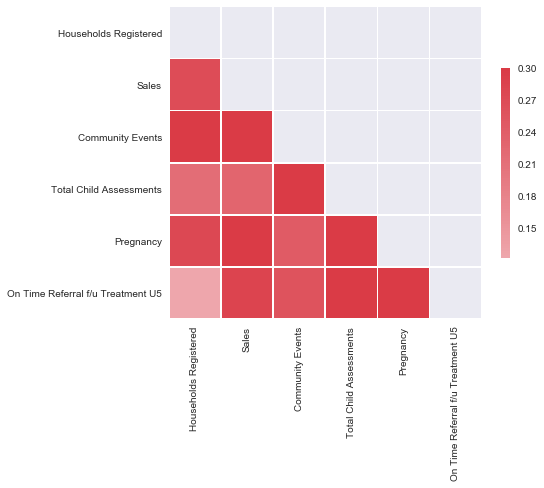

In [8]:
#plotCorrz( corrz(dataset, argz_EPMs) )
print("1. Correlation of the key KPIs")
cout = corrz(dataset, argz_EPMs)
cout
plotCorrz( cout )

### Diseases/Cases



In [9]:
## Malaria  
print( "2. Correlation within Malaria Variables")
cout1 = corrz(dataset, argz_malaria+["U5 Malaria"]  )
cout1

2. Correlation within Malaria Variables


,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,%mRDT,U5 Malaria
All Malaria Assessments,1.000,0.861,0.812,1.000,0.598,0.863
All Malaria Treatments,0.861,1.000,0.938,0.861,0.483,0.958
Act 6pack Issue,0.812,0.938,1.000,0.812,0.533,0.857
mRDT Used,1.000,0.861,0.812,1.000,0.598,0.863
%mRDT,0.598,0.483,0.533,0.598,1.000,0.476
U5 Malaria,0.863,0.958,0.857,0.863,0.476,1.000


3. Correlation within U5 Diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total Child Assessments,Total Child Treatments,On Time Referral f/u Treatment U5
U5 Malaria,1.000,0.260,0.258,0.437,0.776,0.178
U5 Diarrhea,0.260,1.000,0.361,0.325,0.687,0.238
U5 Pneumonia,0.258,0.361,1.000,0.253,0.691,0.290
Total Child Assessments,0.437,0.325,0.253,1.000,0.511,0.374
Total Child Treatments,0.776,0.687,0.691,0.511,1.000,0.326
On Time Referral f/u Treatment U5,0.178,0.238,0.290,0.374,0.326,1.000


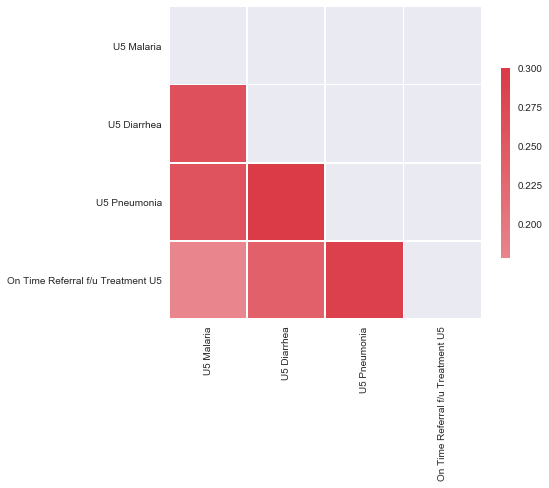

In [10]:
## All U5 Diseases
## Diseases 
print( "3. Correlation within U5 Diseases")
cout2 = corrz(dataset, argz_U5_diseases+["Total Child Assessments", "Total Child Treatments",  "On Time Referral f/u Treatment U5"])
cout2

plotCorrz( corrz(dataset, argz_U5_diseases+["On Time Referral f/u Treatment U5"]) )

### Sales Activity

- Current sales target is KES 2,040. This is used to derive buckets/categories. 


In [11]:

print( "1. n if we bucket sales in multiples of the target amount of KES 2040")
dataset["Class_Sales_Levels"].value_counts()
print("\n\n")

## Regroup
print("2. n when rebucketing so that sample sizes within buckets are reasonable")
dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 2040 , "Below_2040", 
                                         np.where(dataset["Sales"] < 4080, "2040_to_4080",  "Above_4080")) 
dataset["Class_Sales_Levels"].value_counts()
print("\n\n")


1. n if we bucket sales in multiples of the target amount of KES 2040


KeyError: 'Class_Sales_Levels'

In [ ]:
## Regroup 
print( "3. n if bucketing into two groups: Meets Target Vs Misses Target (Occam's Razor + dummy variable)")
dataset["Meets.Sales.Target"] = np.where( dataset["Sales"] < 2040, "Misses Target", "Meets Target")
dataset["Meets.Sales.Target"].value_counts()
print("\n\n")
#pd.get_dummies( dataset["Meets.Sales.Target"])


In [ ]:
print("\n4. Sample Tallies by Sales Target buckets")
sampleStructure(dataset, "Meets.Sales.Target") 
print("\n\n")

** t-tests on the means** 

In [ ]:
from scipy.stats import ttest_ind 

print( "a. t-test Sales means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Sales"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Sales"])

print("\n\n")

print( "b. t-test Household registration means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Households Registered"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Households Registered"])


print("\n\n")

print( "c. t-test Total child assessments means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Total Child Assessments"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Total Child Assessments"])

print("\n\n")

print( "d. t-test all malaria assessments means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["All Malaria Assessments"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["All Malaria Assessments"])


print("\n\n")

print( "e. t-test pregnacy means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Pregnancy"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Pregnancy"])


print("\n\n")

print( "f. t-test total U1 assessments means between those that meet sales target and those that don't ")
ttest_ind( dataset[dataset["Meets.Sales.Target"] == "Meets Target"]["Total U1 Assessments"], dataset[dataset["Meets.Sales.Target"] == "Misses Target"]["Total U1 Assessments"])



print("\n\n")



**SUMMARY**
Working with two groups - 1). Meets Target and 2). Misses Target



#### Meets Sales Target



In [ ]:
print( "1. Correlations for Meets Sales Targett") 
c1=corrz(dataset[ dataset["Meets.Sales.Target"] == "Meets Target"], argz_EPMs, "spearman") 
c1

print( "1b. Visual for Correlations for Meets Sales Targett")
plotCorrz(c1)

#### Misses Sales Target
 

In [ ]:
print( "2. Correlations for Misses Sales Targett") 
c1=corrz(dataset[ dataset["Meets.Sales.Target"] == "Misses Target"], argz_EPMs, "spearman") 
c1

print( "2b. Visual for Correlations for Misses Sales Targett")
plotCorrz(c1)

#### Regressions


In [ ]:
## Using R
